This Kalman Filter is based on the implementation from [Wouter Bulten](https://github.com/wouterbulten/kalmanjs/blob/master/contrib/java/KalmanFilter.java).

In [1]:
def isNaN(num):
    return num != num

The Kalman filter flattens the a measured input signal.

In [2]:
class KalmanFilter(object):
    
    def __init__(self, r, q): 
        self.R = r # Process noise
        self.Q = q # Measurement noise
        
        self.A = 1 # State vector
        self.B = 0 # Control vector
        self.C = 1 # Measurment vector
        
        self.x = float('nan')
        self.cov = 0.0
        
    def predict(self, u = 0):
        return (self.A * float(self.x)) + (self.B * u)

    def uncertainty(self):
        return ((self.A * float(self.cov)) * self.A) + self.R
    
    def filter(self, measurement, u=0):
        if (isNaN(self.x)):
            self.x = (1 / self.C) * measurement
            self.cov = (1 / self.C) * self.Q * (1 / self.C)
        else:
            predX = self.predict(u)
            predCov = self.uncertainty()

            # Kalman Gain
            k_gain = predCov * self.C * (1 / ((self.C * predCov * self.C) + self.Q))

            # Correction
            self.x = predX + k_gain * (measurement - (self.C * predX))
            self.cov = predCov - (k_gain * self.C * predCov)
        return self.x

In [3]:
import random
import numpy as np

def measurments(rssi, x_axis):
    sigma = 3

    g = []
    for x in x_axis:
        rnd_gaus = random.gauss(rssi,sigma)
        g.append(rnd_gaus)

    return np.asarray(g)

In [4]:
import matplotlib.pyplot as plt

def plot(x_axis, values, filtered):
    plt.figure()
    plt.plot(x_axis, values, 'bo', label='Signal')
    plt.plot(x_axis, filtered, 'r', label='Kalman')
    plt.legend()

This example shows how the Kalman Filter can flatten a noisy RSSI signal.

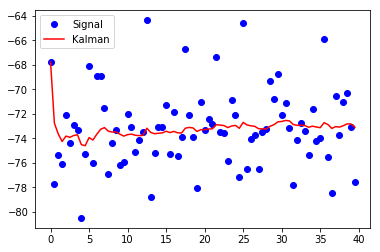

In [5]:
R = 0.01
Q = 3

kalman = KalmanFilter(R, Q)

x_axis = np.arange(0, 40, 0.5)

RSSI = -73
measurements = measurments(RSSI, x_axis)

filtered = []
for f in measurements:
    filtered.append(kalman.filter(f))
    
plot(x_axis, measurements, filtered)